In [16]:
import numpy as np
import pandas as pd


In [17]:
df = pd.read_csv('spam.csv')

In [18]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2542,ham,Aiyo please �_ got time meh.,NaN,NaN,NaN
2845,ham,Wat time u finish ur lect today?,NaN,NaN,NaN
4579,ham,Hi ....My engagement has been fixd on &lt;#&g...,NaN,NaN,NaN
919,ham,Dont talk to him ever ok its my word.,NaN,NaN,NaN
3384,ham,Ok can...,NaN,NaN,NaN
888,ham,You unbelievable faglord,NaN,NaN,NaN
441,ham,You were supposed to wake ME up &gt;:(,NaN,NaN,NaN
4522,ham,Actually I decided I was too hungry so I haven...,NaN,NaN,NaN
4349,ham,Yes. Rent is very expensive so its the way we ...,NaN,NaN,NaN
4976,ham,A boy was late 2 home. His father: \POWER OF F...,NaN,NaN,NaN


In [19]:
df.shape

(5572, 5)

## DATA CLEANING

In [20]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
#drop last 3 coulums
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [23]:
df.sample(5)

,v1,v2
3815,ham,How long does it take to get it.
1444,ham,Those ducking chinchillas
2117,ham,Wish u many many returns of the day.. Happy bi...
4101,ham,Ok then i will come to ur home after half an hour
273,ham,"Usf I guess, might as well take 1 car"


In [24]:
#rename (v1,v2)
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)
df.sample(8)

,target,text
2520,ham,Misplaced your number and was sending texts to...
2757,ham,Yo we are watching a movie on netflix
62,ham,Its a part of checking IQ
5336,ham,Sounds better than my evening im just doing my...
1454,ham,Can �_ all decide faster cos my sis going home...
2933,ham,Yup n her fren lor. I'm meeting my fren at 730.
3728,ham,I'm at home. Please call
209,ham,Both :) i shoot big loads so get ready!


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()

In [27]:
encoder.fit_transform(df['target'])

df.sample(3)

,target,text
2016,ham,"Princess, is your kitty shaved or natural?"
4817,ham,How's ur paper?
5205,spam,Had your mobile 11mths ? Update for FREE to Or...


In [28]:
(df['target']) = encoder.fit_transform(df['target'])

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
#duplicate values
df.duplicated().sum()

403

In [32]:
#drop duplicate values
df = df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

0

In [34]:
df.shape

(5169, 2)

# EDA

In [35]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

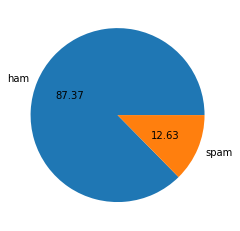

In [36]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [32]:
#not a balanced data

In [9]:
import nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spzzz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
#number of text
df['char_count'] = df['text'].apply(len)

<ipython-input-37-dbd107a65d44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['text'].apply(len)


In [38]:
df.head()

,target,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
#number of words
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-39-a5669ad7b4fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [40]:
df.head()

,target,text,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
df['sent_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-41-1d999968c9f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [42]:
df.head()

,target,text,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
df['target']==0

0        True
1        True
2       False
3        True
4        True
        ...  
5567    False
5568     True
5569     True
5570     True
5571     True
Name: target, Length: 5169, dtype: bool

In [45]:
#only for ham
df[df['target']==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
#only for spam
df[df['target']==1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [47]:
import seaborn as sns

<AxesSubplot:xlabel='char_count', ylabel='Count'>

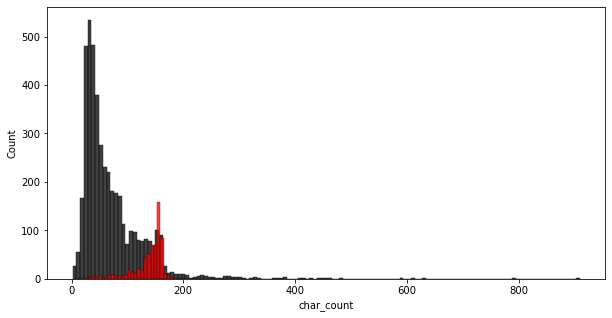

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['char_count'],color='black')
sns.histplot(df[df['target'] == 1]['char_count'],color='red')

<AxesSubplot:xlabel='word_count', ylabel='Count'>

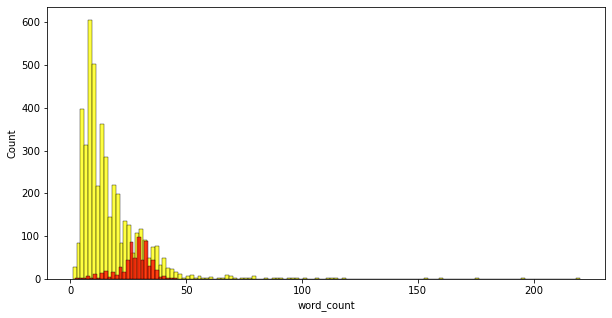

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['word_count'],color='yellow')
sns.histplot(df[df['target'] == 1]['word_count'],color='red')

<AxesSubplot:xlabel='sent_count', ylabel='Count'>

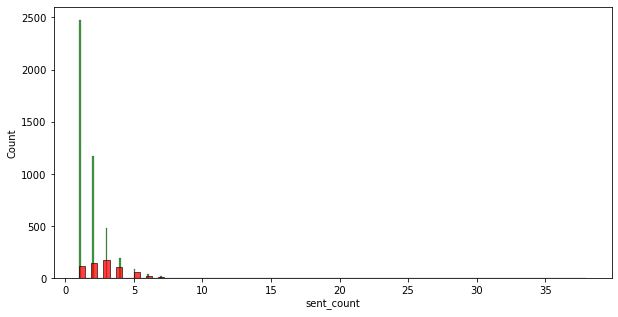

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['sent_count'],color='green')
sns.histplot(df[df['target'] == 1]['sent_count'],color='red')

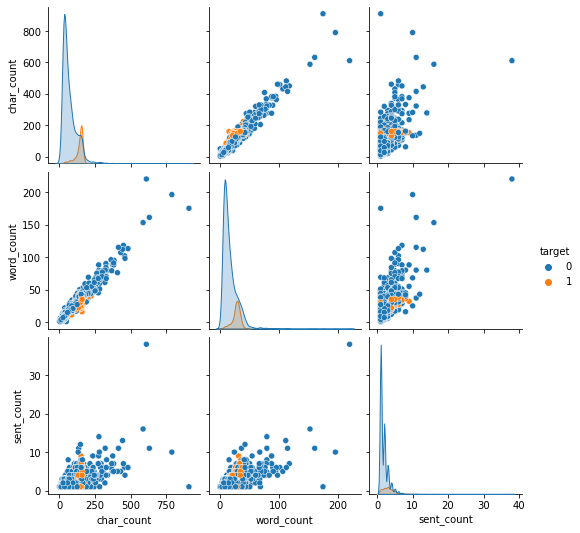

In [51]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

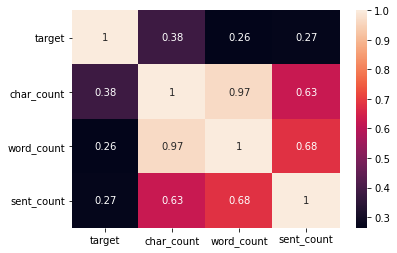

In [52]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing 

In [74]:
#transform into lower case
#tokenize them

In [74]:
#remove stopwords

In [75]:
#steming

In [69]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return ''' '''.join(y)

In [12]:
from nltk.corpus import stopwords

In [55]:
import string

In [67]:
df['text'][95]

'Your free ringtone is waiting to be collected. Simply text the password \\MIX\\" to 85069 to verify. Get Usher and Britney. FML'

In [70]:
transform_text('''Your free ringtone is waiting to be collected. Simply text the password \\MIX\\" to 85069 to verify. Get Usher and Britney. FML''') 

'free rington wait collect simpli text password 85069 verifi get usher britney fml'

In [60]:
from nltk.stem.porter import PorterStemmer

In [61]:
ps = PorterStemmer()
ps.stem('eating')

'eat'

In [72]:
df['transform_text']=df['text'].apply(transform_text)

<ipython-input-72-524e99cd07c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(transform_text)


In [73]:
df.head()

,target,text,char_count,word_count,sent_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
#creating wordcloud

In [78]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [79]:
from wordcloud import WordCloud

In [101]:
wc = WordCloud(width = 800, height = 800, min_font_size = 10, background_color = 'black')

In [117]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=''' '''))

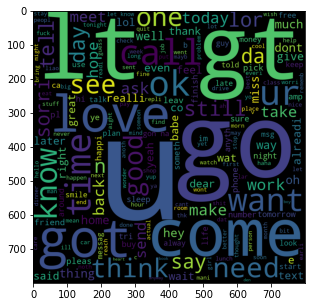

In [118]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)

In [111]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=''' '''))

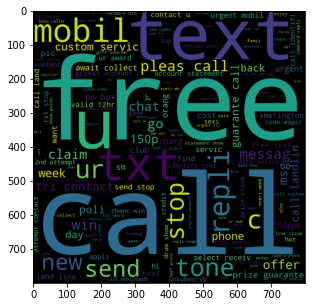

In [114]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

In [119]:
df.head()

,target,text,char_count,word_count,sent_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [125]:
ham_corpus = []
for sms in df[df['target']==0]['transform_text'].tolist():
    for word in sms.split():
        ham_corpus.append(word)        

In [127]:
len(ham_corpus)

35303

C:\Users\Spzzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


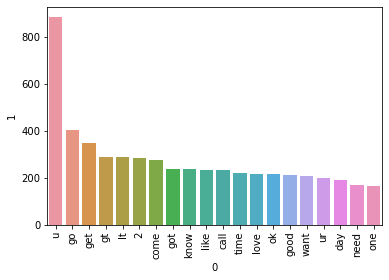

In [135]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [136]:
spam_corpus = []
for sms in df[df['target']==1]['transform_text'].tolist():
    for word in sms.split():
        spam_corpus.append(word)

In [137]:
len(spam_corpus)

9941

C:\Users\Spzzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


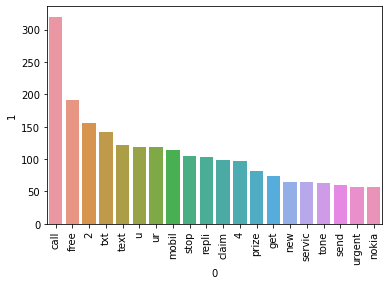

In [138]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [139]:
df.head()

,target,text,char_count,word_count,sent_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
#converting data to vector

In [163]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [144]:
cv = CountVectorizer()

In [164]:
 = TfidfVectorizer(max_features=3000)

In [165]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [166]:
X.shape

(5169, 3000)

In [167]:
Y = df['target'].values

In [168]:
Y.shape

(5169,)

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [171]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [172]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [173]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [174]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [175]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [176]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [192]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [194]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [195]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [196]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [197]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9748549323017408, 0.9745762711864406)

In [198]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.826530612244898
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [199]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [200]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.975822,0.982906
8,ETC,0.979691,0.975610
0,SVC,0.974855,0.974576
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
10,xgb,0.968085,0.933884
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231


In [201]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [202]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.975822
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.968085
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.959381


In [207]:
# model improve

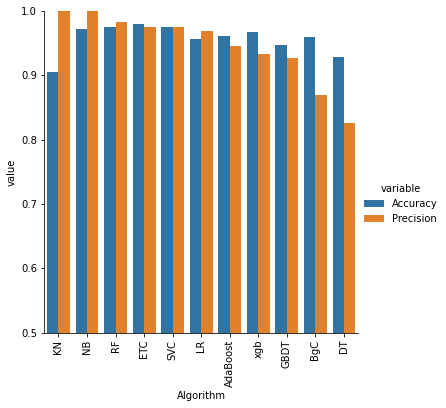

In [215]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [208]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [209]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,ETC,0.979691,0.975610,0.979691,0.975610
4,SVC,0.974855,0.974576,0.974855,0.974576
5,LR,0.956480,0.969697,0.956480,0.969697
6,AdaBoost,0.961315,0.945455,0.961315,0.945455
7,xgb,0.968085,0.933884,0.968085,0.933884
8,GBDT,0.946809,0.927835,0.946809,0.927835
9,BgC,0.959381,0.869231,0.959381,0.869231


In [216]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [217]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [218]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [219]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [220]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
4,SVC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
6,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
7,xgb,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884
8,GBDT,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835
9,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231


In [221]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [222]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [223]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [225]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [226]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [227]:
from sklearn.ensemble import StackingClassifier

In [228]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [233]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [235]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))